In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pylab as pylab
import numpy.polynomial.polynomial as poly
import numpy as np
from scipy.integrate import odeint
import math

### Numerische Lösung

Zunächst wird wieder ein Zustandsvektor definiert.

\begin{align}
\vec{z}= \left( \begin{array}{c}x\\v\end{array} \right)  
\vec{\dot{z}}= \left( \begin{array}{c}z(2)\\ \frac{1}{m}(F_0 \cdot cos{\omega t} -Dz(1)-cz(2)) \end{array} \right)
\end{align}

Der Zustand zum Zeitpunkt t = 0 wird festgelegt als:
\begin{align}
\vec{z_0}= \left( \begin{array}{c}x_0\\v_0\end{array} \right) = \left( \begin{array}{c}0\\0\end{array} \right)
\end{align}

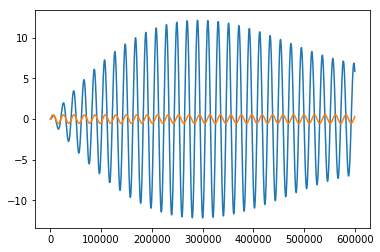

In [3]:
m = 1

z1=[[0,0]]
z2=[[0,0]]

dt = 0.00005
D = 4 * math.pi ** 2 * m 
omega1 = 1 * (2 * math.pi) * 0.97          # (2 * math.pi) => Eine Schwingung pro Sekunde
omega2 = 1 * (2 * math.pi)           # (2 * math.pi) => Eine Schwingung pro Sekunde
F0 = 20
c = 0.1
t = 0.0
tmax = 30

periodendauer = 2 * math.pi / omega1
omegaGes = 1 / periodendauer;
f0t = F0 / (omegaGes ** 2 * m)

def calcNext(innerz, inneromega):
    dz =   [innerz[-1][1], 1 / m * (F0 * math.cos(inneromega * t) - D * innerz[-1][0] - c * innerz[-1][1] )]
    znew = [innerz[-1][0] + dz[0] * dt , innerz[-1][1] + dz[1] * dt]
    innerz.append(znew)

def calcNext2(innerz):
    A = (F0/m)/(( ((D/m) - omegaGes ** 2)**2 + 4*(c/(2*m))**2*omegaGes**2)**0.5)
    znew = [t , A * math.sin(omegaGes * t * 2 * math.pi )]
    innerz.append(znew)

while t < tmax:
    t = t + dt
    calcNext(z1, omega1);
    #calcNext(z2, omega2);
    calcNext2(z2)

plt.plot(range(0,len(z1)), [element[0] for element in z1])
plt.plot(range(0,len(z2)), [element[1] for element in z2])

In einem nächsten Schritt wird ein kleinerer nicht linearer Teil hinzugefügt.

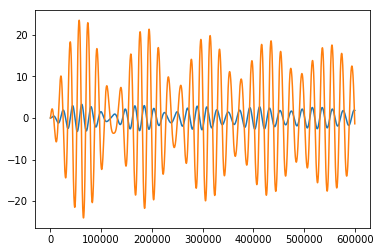

In [9]:
z1=[[0,0]]
z2=[[0,0]]

m = 1

dt = 0.00005
D = 4 * math.pi ** 2 * m 
D3= 4 * math.pi ** 2 * m / 20
omega1 = 1 * (2 * math.pi) * 0.97          # (2 * math.pi) => Eine Schwingung pro Sekunde
omega2 = 1 * (2 * math.pi)           # (2 * math.pi) => Eine Schwingung pro Sekunde
F0 = 20
c = 0.1
t = 0.0
tmax = 30

def calcNext(innerz, inneromega):
    dz =   [innerz[-1][1], 1 / m * (F0 * math.cos(inneromega * t) - D * innerz[-1][0] - D3 * innerz[-1][0]**3 - c * innerz[-1][1] )]
    znew = [innerz[-1][0] + dz[0] * dt , innerz[-1][1] + dz[1] * dt]
    innerz.append(znew)

while t < tmax:
    t = t + dt
    calcNext(z1, omega1);
    calcNext(z2, omega2);

plt.plot(range(0,len(z1)), [element[0] for element in z1])
plt.plot(range(0,len(z2)), [element[1] for element in z2])

In [ ]:
z1=[[1,0]]
z2=[[1,0]]
z3=[[1,0]]
z4=[[1,0]]

dt = 0.0005

F1 = 0.1
F2 = 0.95
F3 = 1
F4 = 1.5

t = 0.0
tmax = 1800
    
def calcNext(zinner, Finner):
    dz =   [zinner[-1][1], Finner * math.cos(0.6 * t) - 0.5 * zinner[-1][1] - math.sin(zinner[-1][0])]
    znew = [zinner[-1][0] + dz[0] * dt , zinner[-1][1] + dz[1] * dt]
    zinner.append(znew)
    

while t < tmax:
    t = t + dt
    calcNext(z1, F1);
    calcNext(z2, F2);
    calcNext(z3, F3);
    calcNext(z4, F4);
    
plt.plot(range(0,len(z1)), [element[0] for element in z1])
plt.plot(range(0,len(z2)), [element[0] for element in z2])
plt.plot(range(0,len(z3)), [element[0] for element in z3])
plt.plot(range(0,len(z4)), [element[0] for element in z4])

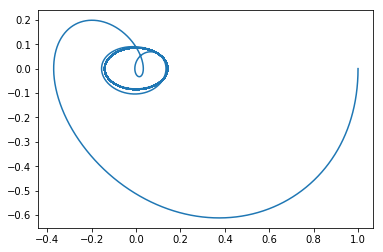

In [4]:
plt.plot([element[0] for element in z1], [element[1] for element in z1])

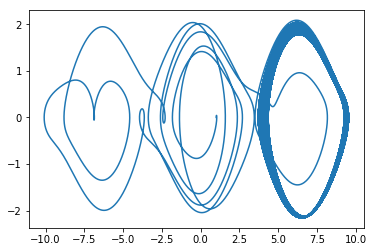

In [5]:
plt.plot([element[0] for element in z2], [element[1] for element in z2])

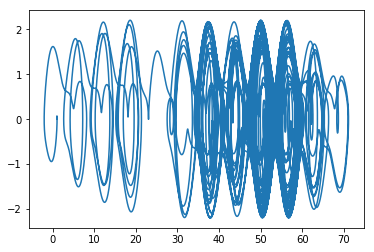

In [6]:
plt.plot([element[0] for element in z3], [element[1] for element in z3])

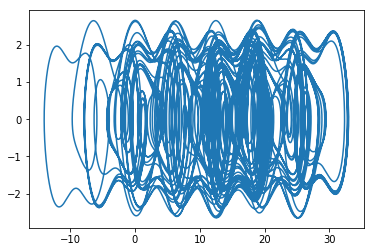

In [7]:
plt.plot([element[0] for element in z4], [element[1] for element in z4])